# Heroes stats

In [1]:
# analysis
from picker import Hero
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
# html parsing
from lxml import etree
from bs4 import BeautifulSoup
import requests
from io import StringIO
import json

Logger initiated!


### Get all heroes

In [2]:
heroes_list_url = 'https://www.dotabuff.com/heroes'
headers = json.load(open('headers.json'))
response = requests.get(heroes_list_url, headers=headers)
parser = etree.HTMLParser()
tree = etree.parse(StringIO(response.text), parser)

In [3]:
heroes_tree = tree.xpath('/html/body/div[1]/div[8]/div[2]/div[3]/section[2]/footer/div')[0]
soup = BeautifulSoup(etree.tostring(heroes_tree), 'html.parser')

In [4]:
# hero name path
soup.find_all('a')[0].div.div.text

'Abaddon'

In [5]:
# link to heroe's page
soup.find_all('a')[0]['href']

'/heroes/abaddon'

In [6]:
all_heroes = list()
for hero in soup.find_all('a')[:10]:
    hero_id = hero['href'].split('/')[-1]
    print(hero_id)
    all_heroes.append(Hero(hero_id))

abaddon
alchemist
ancient-apparition
anti-mage
arc-warden
axe
bane
batrider
beastmaster
bloodseeker


In [7]:
heroes_list = [h.id for h in all_heroes]
# all_heroes[1].get_versus(heroes_list)

In [8]:
vs_heroes = heroes_list[:10]
vs = []
for i, hero in enumerate(vs_heroes):
    vs_dict = Hero(hero).get_versus(vs_heroes)
    versus = [vs_dict[key] for key in vs_dict]
    versus.insert(i, 0)
    vs.append(versus)

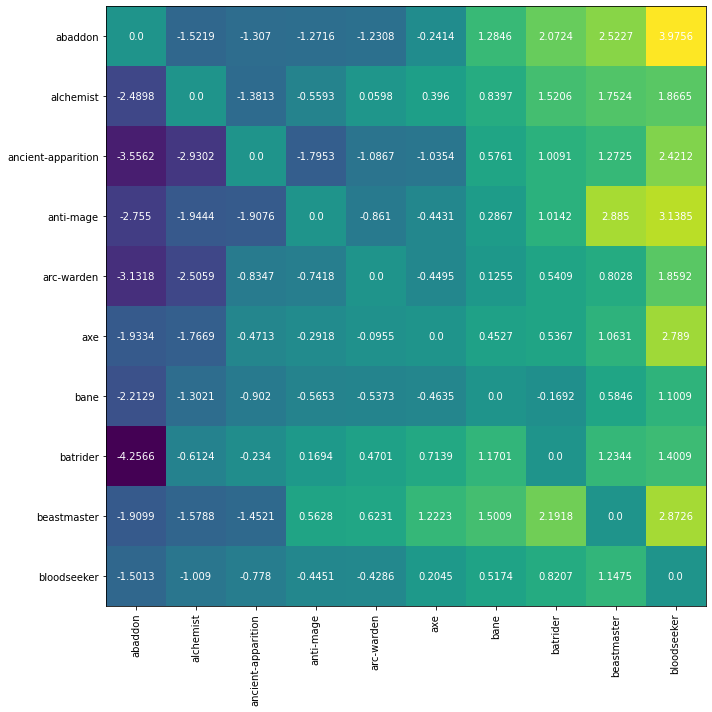

In [9]:
npvs = np.array(vs)
fig, ax = plot.subplots()
im = ax.imshow(npvs)

ax.set_xticks(np.arange(len(vs_heroes)))
ax.set_yticks(np.arange(len(vs_heroes)))
ax.set_xticklabels(vs_heroes)
ax.set_yticklabels(vs_heroes)
plot.setp(ax.get_xticklabels(), rotation=90)

for i in range(len(vs_heroes)):
    for j in range(len(vs_heroes)):
        text = plot.text(j, i, npvs[i, j], ha='center', va='center', color='w')

fig.set_size_inches(10, 10)
fig.tight_layout()

In [10]:
vs_heroes

['abaddon',
 'alchemist',
 'ancient-apparition',
 'anti-mage',
 'arc-warden',
 'axe',
 'bane',
 'batrider',
 'beastmaster',
 'bloodseeker']